In [1611]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")
from statsmodels.formula.api import ols
import sklearn
import scipy.stats as stats

In [1612]:
data = pd.read_csv('file:///Users/chrisfiorentine/Downloads/data.csv', index_col=0)

In [1613]:
data

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813

In [1614]:
data.isnull().describe()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
count,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207,18207
unique,1,1,1,1,1,1,1,1,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,18207,18207,18207,18207,18207,18207,18207,18207,17966,18207,18207,18207,18207,18159,18159,18159,18159,18159,18159,18159,18147,18147,16654,16943,17918,18159,18159,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,16122,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,18159,16643


In [1615]:
data.shape

(18207, 88)

In [1758]:
data['Overall'].max()

94

In [1619]:
data.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [1620]:
data.corr()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.356191,-0.075784,-0.056914,0.182074,-0.131994,-0.082323,-0.106815,-0.136279,-0.159915,-0.030340,-0.169511,-0.199549,-0.186764,-0.100184,0.133236,0.132437,-0.019897,-0.408617,0.048463,-0.166133,-0.169369,-0.053895,-0.259756,-0.161549,-0.228329,-0.160602,-0.088330,-0.215170,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778
Age,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253765,0.059867,0.027649,-0.241156,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.082443,0.187422,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313
Overall,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499491,0.212015,0.414463,-0.218931,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.356493,0.498894,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276
Potential,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372993,0.162346,0.354290,-0.010474,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.245616,0.348141,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341
Special,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292208,0.341855,0.763412,-0.133716,0.866417,0.724244,0.644421,0.906729,0.773974,0.874274,0.851900,0.806414,0.846302,0.912107,0.654337,0.645963,0.699673,0.597169,0.586788,0.835277,0.321846,0.792762,0.192990,0.840049,0.666236,0.561676,0.824307,0.761992,0.734533,0.752331,0.561866,0.538802,0.506968,-0.674637,-0.673625,-0.670254,-0.668272,-0.673238
International Reputation,-0.356191,0.253765,0.499491,0.372993,0.292208,1.000000,0.128317,0.208153,-0.077298,0.191770,0.178373,0.157483,0.242803,0.243089,0.179041,0.233681,0.223564,0.239525,0.217946,0.044319,0.044070,0.100869,0.445614,0.050076,0.227772,0.120931,0.094780,0.131280,0.213960,0.173327,0.129586,0.183003,0.284600,0.218620,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444
Weak Foot,-0.075784,0.059867,0.212015,0.162346,0.341855,0.128317,1.000000,0.340721,-0.035410,0.307925,0.357416,0.183238,0.322133,0.357340,0.352658,0.345468,0.330472,0.277174,0.356383,0.261435,0.248822,0.302062,0.201341,0.254022,0.332855,0.069752,0.232094,-0.008470,0.355967,0.131524,0.053097,0.346896,0.337897,0.330252,0.278132,0.065673,0.042646,0.026105,-0.231905,-0.233098,-0.229395,-0.231298,-0.232574
Skill Moves,-0.056914,0.027649,0.414463,0.354290,0.763412,0.208153,0.340721,1.000000,-0.035194,0.741035,0.743439,0.443005,0.730363,0.745077,0.839757,0.771052,0.701068,0.622342,0.818051,0.652356,0.624098,0.681765,0.377044,0.578459,0.718237,0.107553,0.570226,-0.041475,0.752980,0.347795,0.209604,0.781248,0.674057,0.690434,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925
Jersey Number,0.182074,-0.241156,-0.218931,-0.010474,-0.133716,-0.077298,-0.035410,-0.035194,1.000000,-0.076585,-0.006639,-0.091688,-0.100241,-0.026731,-0.028021,-0.055428,-0.068843,-0.117424,-0.073210,-0.004395,-0.015069,-0.034158,-0.192622,0.008009,-0.053860,-0.104179,-0.127822,-0.158

In [1621]:
data['Wage']

0        €565K
1        €405K
2        €290K
3        €260K
4        €355K
         ...  
18202      €1K
18203      €1K
18204      €1K
18205      €1K
18206      €1K
Name: Wage, Length: 18207, dtype: object

In [1622]:
data['Work Rate']

0        Medium/ Medium
1             High/ Low
2          High/ Medium
3        Medium/ Medium
4            High/ High
              ...      
18202    Medium/ Medium
18203    Medium/ Medium
18204    Medium/ Medium
18205    Medium/ Medium
18206    Medium/ Medium
Name: Work Rate, Length: 18207, dtype: object

In [1623]:
data['International Reputation']

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
18202    1.0
18203    1.0
18204    1.0
18205    1.0
18206    1.0
Name: International Reputation, Length: 18207, dtype: float64

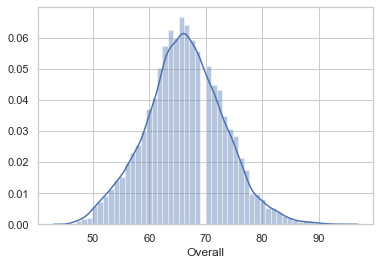

In [1624]:
sns.distplot(data['Overall'])

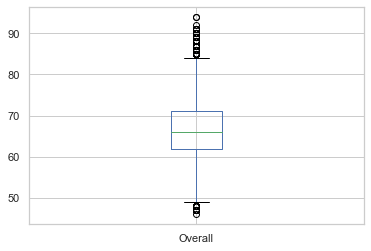

In [1625]:
data.boxplot(['Overall'])

In [1626]:
data.Wage = data['Wage'].apply(lambda x: x.strip('K'))
data.Wage = data['Wage'].apply(lambda x: x.strip('€'))
data.Wage = data['Wage'].apply(lambda x: float(x))

In [1627]:
data.Wage.describe()

count    18207.000000
mean         9.731312
std         21.999290
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        565.000000
Name: Wage, dtype: float64

In [1628]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [1629]:
data['Release Clause'] = data['Release Clause'].apply(lambda x: str(x))
data['Release Clause'] = data['Release Clause'].apply(lambda x: x.strip('K'))
data['Release Clause'] = data['Release Clause'].apply(lambda x: x.strip('€'))
data['Release Clause'] = data['Release Clause'].apply(lambda x: x.strip('M'))
data['Release Clause'] = data['Release Clause'].apply(lambda x: float(x))

In [1630]:
data = pd.get_dummies(data, columns = ['International Reputation'], drop_first = True)
data = pd.get_dummies(data, columns = ['Weak Foot', 'Skill Moves','Work Rate'], drop_first = True)

In [1631]:
cols =[]
for i in data.corr():
    cols.append(i)

In [1632]:
cols.remove('ID')

In [1633]:
n = 4
row_groups= [cols[i:i+n] for i in range(0, len(cols), n) ]

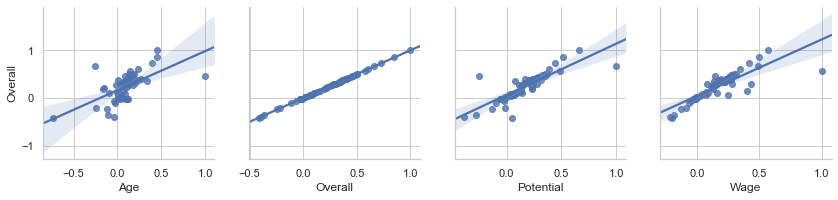

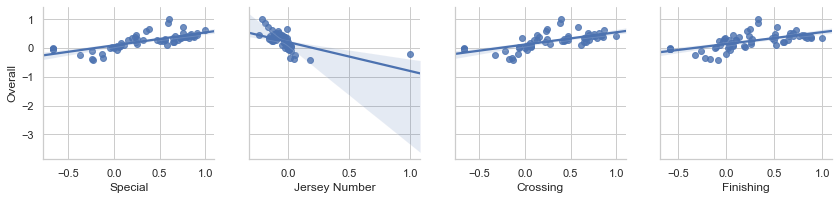

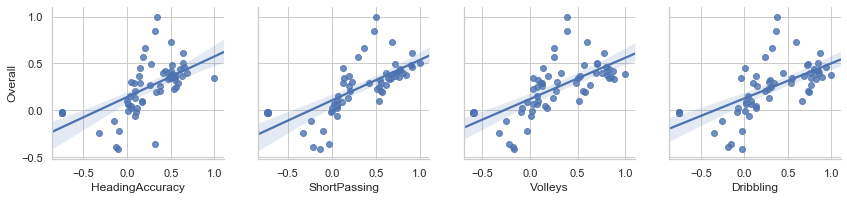

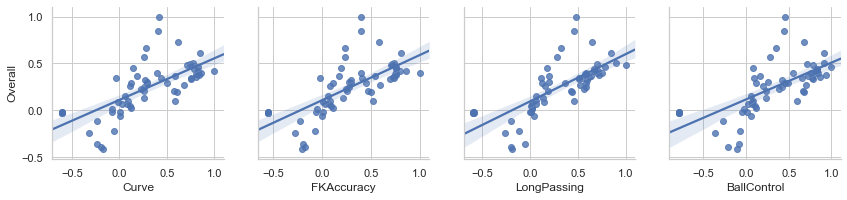

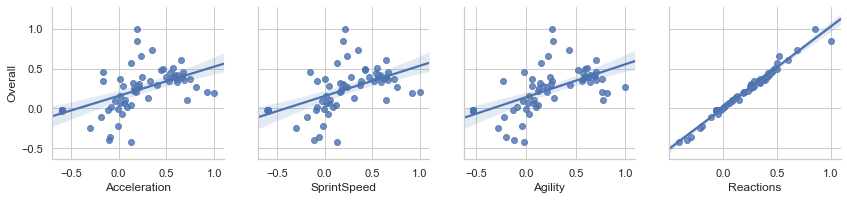

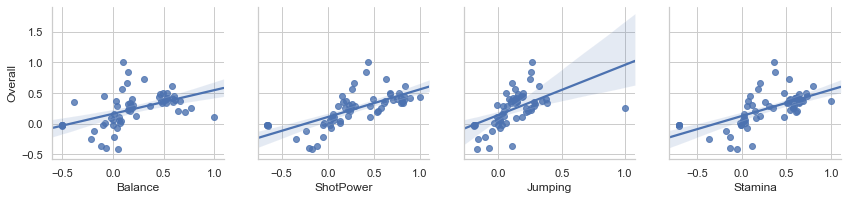

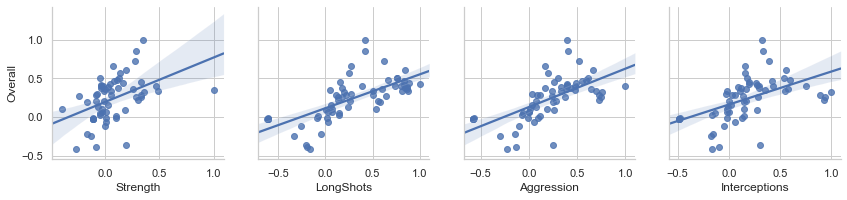

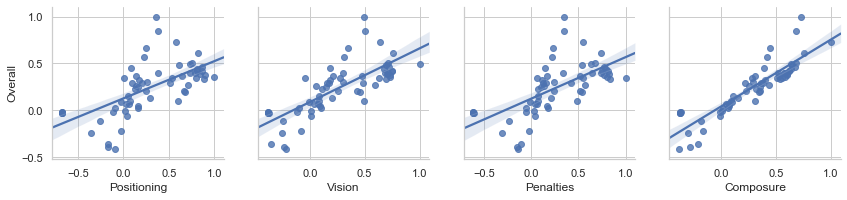

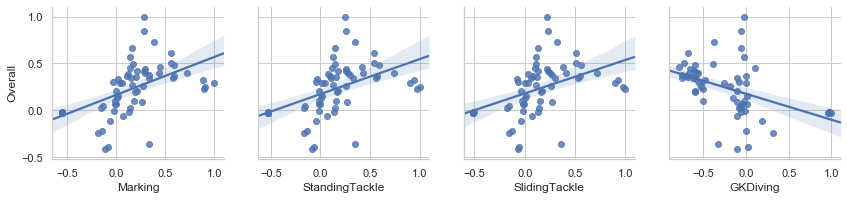

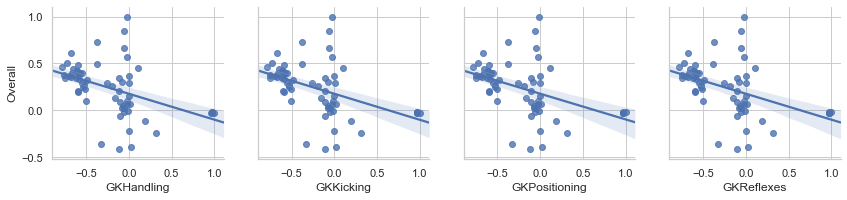

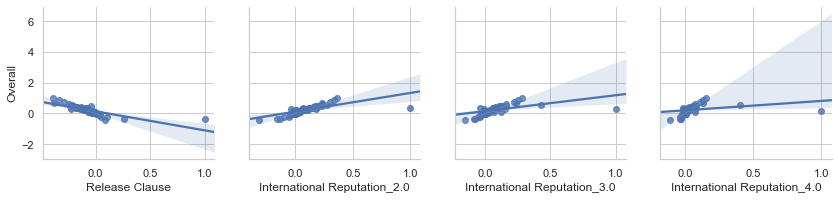

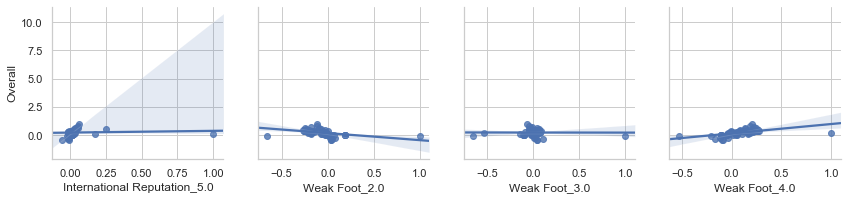

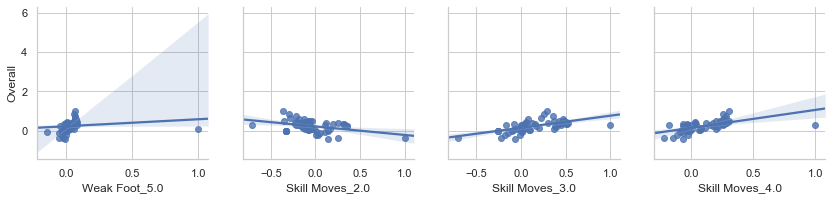

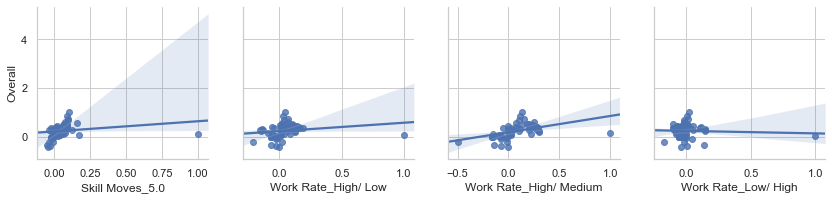

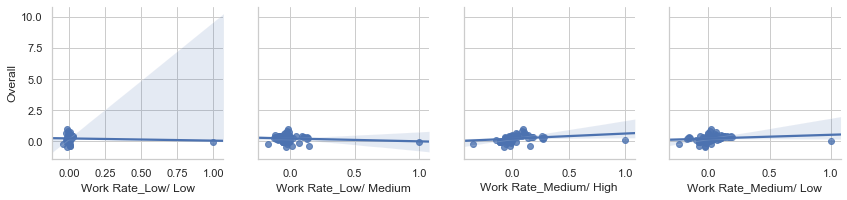

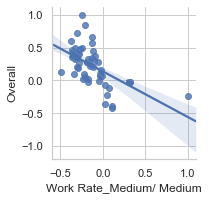

In [1634]:
for i in row_groups:
    pp = sns.pairplot(data=data.corr(), y_vars=['Overall'],x_vars=i, kind="reg", height=3)

In [1635]:
data.describe()

,ID,Age,Overall,Potential,Wage,Special,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,16643.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,214298.338606,25.122206,66.238699,71.307299,9.731312,1597.809908,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,228.201274,0.069259,0.016971,0.002801,0.000330,0.206569,0.623332,0.146208,0.012578,0.470423,0.362498,0.050365,0.002801,0.038392,0.174274,0.024112,0.001867,0.024661,0.092821,0.046685,0.538804
std,29965.244204,4.669943,6.908930,6.136496,21.999290,272.586016,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,299.251866,0.253901,0.129168,0.052853,0.018151,0.404855,0.484564,0.353324,0.111445,0.499138,0.480735,0.218703,0.052853,0.192146,0.379355,0.153400,0.043174,0.155094,0.290190,0.210970,0.498506
min,16.000000,16.000000,46.000000,48.000000,0.000000,731.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,1457.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

# Statistical Testing

In [1636]:
strikers = data

In [1637]:
strikers = strikers.drop(data[data['Position'] != 'ST' ].index)

In [1638]:
strikers.shape

(2152, 104)

In [1639]:
centerbacks = data

In [1640]:
centerbacks = centerbacks.drop(data[data['Position'] != 'CB' ].index)

In [1641]:
centerbacks.shape

(1778, 104)

In [1642]:
print(strikers['Overall'].mean())
print(centerbacks['Overall'].mean())

65.53578066914498
65.02474690663666


In [1643]:
stats.ttest_ind(strikers['Overall'],centerbacks['Overall'])

Ttest_indResult(statistic=2.3625811070786735, pvalue=0.01819664948795387)

In [1644]:
print(strikers['Age'].mean())
print(goalies['Age'].mean())

24.662639405204462
26.043456790123457


In [1645]:
stats.ttest_ind(strikers['Age'], goalies['Age'])

Ttest_indResult(statistic=-8.741793994608155, pvalue=3.270550962810346e-18)

In [1771]:
print(goalies['Overall'].mean())
print(offense['Overall'].mean())
print(defense['Overall'].mean())
print(midfield['Overall'].mean())

64.60345679012346
66.23460223651428
66.24039044835384
66.23751999558718


In [1768]:
stats.ttest_ind(goalies['Overall'], offense['Overall'])

Ttest_indResult(statistic=-9.921149668787034, pvalue=3.8274523686304194e-23)

In [1770]:
stats.ttest_ind(defense['Overall'], midfield['Overall'])

Ttest_indResult(statistic=0.03957070054726503, pvalue=0.9684356045654429)

In [1646]:
data.corr()

,ID,Age,Overall,Potential,Wage,Special,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
ID,1.000000,-0.739208,-0.417025,0.047074,-0.204610,-0.231352,0.182074,-0.131994,-0.082323,-0.106815,-0.136279,-0.159915,-0.030340,-0.169511,-0.199549,-0.186764,-0.100184,0.133236,0.132437,-0.019897,-0.408617,0.048463,-0.166133,-0.169369,-0.053895,-0.259756,-0.161549,-0.228329,-0.160602,-0.088330,-0.215170,-0.140657,-0.384473,-0.110198,-0.085929,-0.068409,-0.105594,-0.111149,-0.106652,-0.118250,-0.105778,0.089067,-0.313995,-0.154555,-0.104210,-0.053603,0.040057,0.042507,-0.097690,-0.011226,0.141584,-0.062943,-0.067335,-0.046118,-0.006371,-0.003027,-0.035922,-0.016864,-0.030401,-0.071815,-0.024407,0.104323
Age,-0.739208,1.000000,0.452350,-0.253312,0.141145,0.236695,-0.241156,0.130545,0.068660,0.147183,0.132894,0.142472,0.010166,0.143276,0.193467,0.181310,0.084969,-0.158667,-0.151682,-0.019395,0.453124,-0.089877,0.156947,0.177167,0.097793,0.332798,0.155096,0.265190,0.197845,0.082443,0.187422,0.139535,0.391023,0.142817,0.119745,0.103089,0.101277,0.106419,0.104964,0.116402,0.103313,-0.041166,0.236018,0.109656,0.061146,0.024797,-0.029709,-0.043228,0.084078,0.009817,-0.111357,0.052980,0.032426,0.020422,0.009156,0.000163,0.054006,0.012489,0.045057,0.090039,0.019743,-0.119996
Overall,-0.417025,0.452350,1.000000,0.660939,0.571926,0.606960,-0.218931,0.394972,0.332515,0.340776,0.502550,0.391338,0.372426,0.419491,0.396892,0.483909,0.460197,0.196869,0.210647,0.264952,0.850045,0.103160,0.441118,0.264435,0.365656,0.349326,0.420795,0.395470,0.321326,0.356493,0.498894,0.341429,0.727655,0.286505,0.252629,0.222811,-0.025937,-0.025062,-0.029372,-0.017674,-0.023276,-0.392288,0.368197,0.287079,0.153252,0.064635,-0.111632,-0.065644,0.208440,0.069078,-0.364641,0.288059,0.302192,0.103162,0.048167,0.130156,0.019135,-0.012727,-0.015900,0.092863,0.019901,-0.241637
Potential,0.047074,-0.253312,0.660939,1.000000,0.486413,0.383727,-0.010474,0.246319,0.243355,0.200988,0.369189,0.254906,0.315019,0.279944,0.230544,0.321437,0.354396,0.234608,0.236771,0.222310,0.513425,0.138025,0.288318,0.109151,0.202563,0.075769,0.266740,0.171174,0.154908,0.245616,0.348141,0.224281,0.440008,0.162801,0.143564,0.128980,-0.053446,-0.054672,-0.059061,-0.052589,-0.053341,-0.385456,0.237766,0.237412,0.131305,0.058267,-0.092277,-0.022084,0.133050,0.063661,-0.282188,0.218511,0.275692,0.092692,0.037463,0.104831,-0.012715,-0.024764,-0.040686,0.028860,-0.000178,-0.128877
Wage,-0.204610,0.141145,0.571926,0.486413,1.000000,0.347835,-0.086561,0.232834,0.217439,0.187967,0.296691,0.257357,0.237150,0.259550,0.236385,0.276762,0.277615,0.124985,0.130315,0.156287,0.495560,0.088873,0.258351,0.129691,0.177562,0.139360,0.249084,0.194581,0.157415,0.226775,0.315395,0.222440,0.419597,0.145594,0.126291,0.111025,-0.025595,-0.025177,-0.028325,-0.025489,-0.025992,-0.214962,0.274070,0.432151,0.403367,0.247823,-0.068463,-0.050221,0.131113,0.072173,-0.181956,0.077880,0.277543,0.160271,0.019879,0.071526,-0.009360,-0.009187,-0.021803,0.039062,-0.001948,-0.130577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

# First Model

In [1647]:
features = data.drop(['ID','Name','Photo','Nationality','Flag','Club','Club Logo','Value', 'Preferred Foot','Real Face','Position','Jersey Number','Joined','Loaned From','Contract Valid Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Body Type'],axis =1)
features.dropna(inplace = True)
target = features['Overall']
features2 = features.drop(['Overall'],axis = 1)

In [1648]:
features2

,Age,Potential,Wage,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,31,94,565.0,2202,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,33,94,405.0,2228,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,26,93,290.0,2143,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
3,27,93,260.0,1471,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,27,92,355.0,2281,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,65,1.0,1307,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18203,19,63,1.0,1098,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18204,16,67,1.0,1189,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18205,17,66,1.0,1228,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [1649]:
X_train, X_test, y_train, y_test = train_test_split(features2, target, random_state=30)

In [1650]:
X_train.isnull().describe()

,Age,Potential,Wage,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
count,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482,12482


In [1651]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns= features2.columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns = features2.columns)

In [1652]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
print('Training Root Mean Squared Error:' , train_rmse)

Training Root Mean Squared Error: 1.8058845090213749


In [1653]:
y_test_pred = lm.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))


print('Testing Root Mean Squared Error:' , test_rmse)

Testing Root Mean Squared Error: 1.8356560814974079


In [1654]:
lm.coef_

array([ 2.28611049e+00,  2.91407045e+00,  5.42352607e-01,  1.74188268e+01,
       -9.00490147e-01, -8.68123725e-01, -2.62466097e-01, -3.88512805e-01,
       -1.22911575e+00, -1.13403023e+00, -1.20487775e+00, -1.08038949e+00,
       -1.01416665e+00,  1.20553771e-01, -6.75795889e-01, -5.81946280e-01,
       -8.53537630e-01,  6.98200547e-01, -1.14765979e+00, -8.53058769e-01,
       -7.19889056e-01, -4.81606151e-01, -4.33193019e-01, -1.27218940e+00,
       -1.14021540e+00, -1.23727045e+00, -1.73102073e+00, -1.12896894e+00,
       -1.18141071e+00,  4.89021367e-01, -9.64069395e-01, -9.49370949e-01,
       -1.73119665e+00, -2.12987208e-01, -3.75388810e-01, -7.38037858e-01,
       -5.74934868e-01, -7.34267914e-02, -1.60715140e-01, -5.44441370e-02,
       -4.78538508e-02, -1.15808021e-01, -1.33359238e-01,  2.04692385e-02,
       -7.83550563e-02,  3.85691319e-02,  5.99032890e-03,  7.58459325e-01,
        1.07931678e+00,  6.69436153e-01,  2.13876825e-01,  1.44199168e-01,
        1.63849346e-01,  

In [1655]:
lm_coef01 = pd.DataFrame(data=lm.coef_).T
lm_coef01.columns = X_train.columns
lm_coef01 = lm_coef01.T.sort_values(by=0, ascending = False).T

In [1656]:
lm_coef01.T.head()

,0
Special,17.418827
Potential,2.914070
Age,2.286110
Skill Moves_3.0,1.079317
Skill Moves_2.0,0.758459


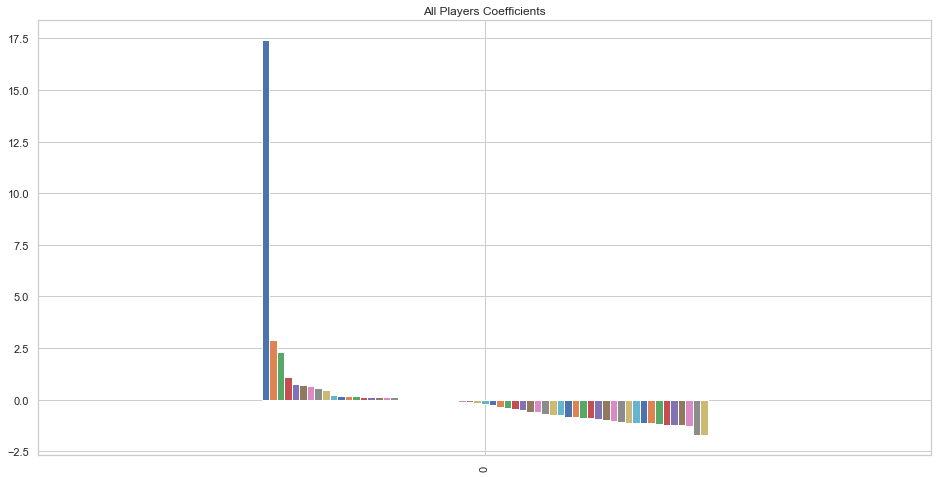

In [1657]:
lm_coef01.plot(kind='bar', title='All Players Coefficients', legend=False, figsize=(16,8))

In [1658]:
sklearn.metrics.classification_report

<function sklearn.metrics.classification.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)>

In [1659]:
features2.columns

Index(['Age', 'Potential', 'Wage', 'Special', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'International Reputation_2.0', 'International Reputation_3.0',
       'International Reputation_4.0', 'International Reputation_5.0',
       'Weak Foot_2.0', 'Weak Foot_3.0', 'Weak Foot_4.0', 'Weak Foot_5.0',
       'Skill Moves_2.0', 'Skill Moves_3.0', 'Skill Moves_4.0',
       'Skill Moves_5.0', 'Work Rate_High/ Low', 'Work Rate_High/ Medium',
       'Work Rate_Low/ High', 'Work Rate_Low/ Low', 'Work Rate_Low/ Me

In [1660]:
model = ols(formula = 'Overall~Age+Potential+Value+Wage+Special+Crossing+Finishing+HeadingAccuracy+ShortPassing+Volleys+Dribbling+Curve+FKAccuracy+LongPassing+BallControl+Acceleration+SprintSpeed+Agility+Reactions+Balance+ShotPower+Jumping+Stamina+Strength+LongShots+Aggression+Interceptions+Positioning+Vision+Penalties+Composure+Marking+StandingTackle+SlidingTackle+GKDiving+GKHandling+GKKicking+GKPositioning+GKReflexes',data = data).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     3334.
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        10:50:08   Log-Likelihood:                -25675.
No. Observations:               18159   AIC:                         5.186e+04
Df Residuals:                   17904   BIC:                         5.385e+04
Df Model:                         254                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           34.9091      0.286    122.173      0.000      34.349      35.469
Value[T.€1.1M]       1.7339      0.081     21.489      0.000       1.576       1.892
Value[T.€1.2M]       1.9005      0.085     22.268      0.000       1.733       2.068
Value[T.€1.3M]       2.0596      0.090     22.903      0.000       1.883       2.236
Value[T.€1.4M]       2.0473      0.094     21.884      0.000       1.864       2.231
Value[T.€1.5M]       2.4346      0.110     22.209      0.000       2.220       2.649
Value[T.€1.6M]       2.1308      0.104     20.436      0.000       1.926       2.335
Value[T.€1.7M]       2.2988      0.113     20.329      0.000       2.077       2.520
Value[T.€1.8M]       2.2801      0.098     23.314      0.000       2.088       2.472
Value[T.€1.9M]       2.8357      0.114     24.979      0.000       2.613       3.058
Value[T.€10.5M]      8.3662      0.139     59.978      0.000       8.093       8.640
Value[T.€100K]      -7.3637      0.104    -71.144      0.000      -7.567      -7.161
Value[T.€102M]      18.3453      1.043     17.593      0.000      16.301      20.389
Value[T.€10K]      -12.0951      0.271    -44.581      0.000     -12.627     -11.563
Value[T.€10M]        8.0305      0.135     59.355      0.000       7.765       8.296
Value[T.€11.5M]      8.5798      0.169     50.900      0.000       8.249       8.910
Value[T.€110.5M]    19.4436      1.095     17.753      0.000      17.297      21.590
Value[T.€110K]      -7.2271      0.104    -69.487      0.000      -7.431      -7.023
Value[T.€118.5M]    19.8952      1.032     19.283      0.000      17.873      21.918
Value[T.€11M]        8.5839      0.168     50.966      0.000       8.254       8.914
Value[T.€12.5M]      9.1353      0.166     55.172      0.000       8.811       9.460
Value[T.€120K]      -6.4286      0.101    -63.911      0.000      -6.626      -6.231
Value[T.€12M]        8.8653      0.151     58.543      0.000       8.568       9.162
Value[T.€13.5M]      9.2010      0.234     39.272      0.000       8.742       9.660
Value[T.€130K]      -6.5903      0.099    -66.624      0.000      -6.784      -6.396
Value[T.€13M]        9.2521      0.184     50.292      0.000       8.891       9.613
Value[T.€14.5M]      9.8993      0.222     44.542      0.000       9.464      10.335
Value[T.€140K]      -5.8932      0.099    -59.593      0.000      -6.087      -5.699
Value[T.€14M]        9.7075      0.184     52.657      0.000       9.346      10.069
Value[T.€15.5M]      9.9696      0.203     49.121      0.000       9.572      10.367
Value[T.€150K]      -5.7297      0.102    -56.100      0.000      -5.930      -5.529
Value[T.€15M]        9.7786      0.230     42.499      0.000       9.328      10.230
Value[T.€16.5M]     10.2735      0.303     33.868      0.000       9.679      10.868
Value[T.€160K]      -5.

In [1661]:
data.shape

(18207, 104)

In [1662]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred_3 = lasso.predict(X_train)
y_pred3 = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred_3)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 1.4281023249918123
Testing Error: 1.8397076876014096


In [1762]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0,  ascending= False).T
lasso_coef01.T.head(8)

,0
Potential,2.967231
Age,2.315567
Reactions,1.307719
BallControl,1.160148
GKReflexes,0.891353
HeadingAccuracy,0.788743
GKDiving,0.723956
GKHandling,0.524048


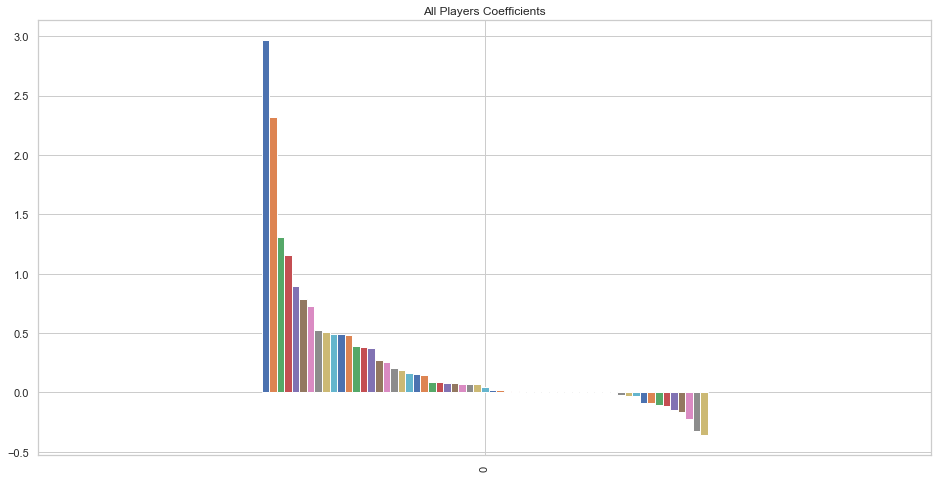

In [1664]:
lasso_coef01.plot(kind='bar', title='All Players Coefficients', legend=False, figsize=(16,8))


# Position Players

In [1665]:
no_goalies = data

In [1666]:
no_goalies = no_goalies.drop(data[data['Position'] == 'GK' ].index)

In [1667]:
no_goalies.shape

(16182, 104)

In [1668]:
no_goalies.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo',
       ...
       'Skill Moves_4.0', 'Skill Moves_5.0', 'Work Rate_High/ Low',
       'Work Rate_High/ Medium', 'Work Rate_Low/ High', 'Work Rate_Low/ Low',
       'Work Rate_Low/ Medium', 'Work Rate_Medium/ High',
       'Work Rate_Medium/ Low', 'Work Rate_Medium/ Medium'],
      dtype='object', length=104)

In [1669]:
no_goalies_features = no_goalies.drop(['ID','Name','Photo','Nationality','Flag','Club','Body Type','Club Logo','Value', 'Preferred Foot','Real Face','Position','Jersey Number','Joined','Loaned From','Contract Valid Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'],axis =1)
no_goalies_features.dropna(inplace = True)
target2 = no_goalies_features['Overall']
no_goalies_features = no_goalies_features.drop(['Overall'],axis = 1)

In [1670]:
no_goalies_features

,Age,Potential,Wage,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,31,94,565.0,2202,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,33,94,405.0,2228,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,26,93,290.0,2143,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,27,92,355.0,2281,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
5,27,91,340.0,2142,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,65,1.0,1307,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18203,19,63,1.0,1098,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18204,16,67,1.0,1189,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18205,17,66,1.0,1228,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [1671]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(no_goalies_features, target2, random_state=25)

In [1672]:
scaler2 = StandardScaler()
scaler2.fit(X_train2)
X_train2 =pd.DataFrame(data=scaler2.transform(X_train2), columns= no_goalies_features.columns)
X_test2 =pd.DataFrame(data=scaler2.transform(X_test2), columns = no_goalies_features.columns)

In [1673]:
no_goalies_model = LinearRegression()
no_goalies_model = no_goalies_model.fit(X_train2, y_train2)
y_train_pred2 = no_goalies_model.predict(X_train2)
train_rmse2 = np.sqrt(metrics.mean_squared_error(y_train2, y_train_pred2))
print('Training Root Mean Squared Error:' , train_rmse2)

Training Root Mean Squared Error: 1.7586951591861848


In [1674]:
y_test_pred2 = no_goalies_model.predict(X_test2)
test_rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_test_pred2))


print('Testing Root Mean Squared Error:' , test_rmse2)

Testing Root Mean Squared Error: 1.762622697641846


In [1675]:
no_goalies_coef01 = pd.DataFrame(data=no_goalies_model.coef_).T
no_goalies_coef01.columns = X_train2.columns
no_goalies_coef01 = no_goalies_coef01.T.sort_values(by=0, ascending = False).T
no_goalies_coef01.T.head()

,0
Skill Moves_2.0,1.062326e+12
Skill Moves_3.0,1.045069e+12
Skill Moves_4.0,4.836723e+11
Skill Moves_5.0,1.197444e+11
Special,1.698538e+01


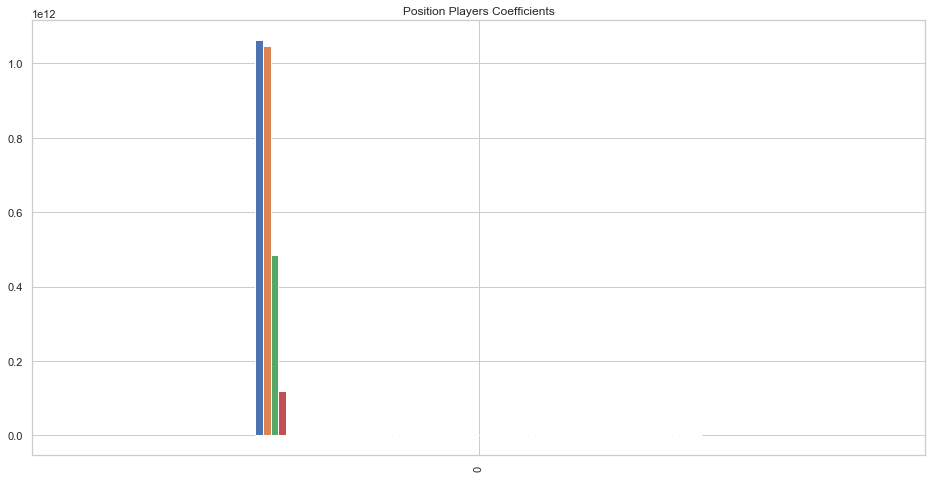

In [1676]:
no_goalies_coef01.plot(kind='bar', title='Position Players Coefficients', legend=False, figsize=(16,8))

In [1677]:
from sklearn.linear_model import Lasso

no_goalies_lasso = Lasso(alpha=0.01, normalize=False)

no_goalies_lasso.fit(X_train2,y_train2)

y_train_pred_4 = no_goalies_lasso.predict(X_train2)
y_pred4 = no_goalies_lasso.predict(X_test2)

train_rmse = metrics.mean_absolute_error(y_train2, y_train_pred_4)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred4))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 1.3885534649147668
Testing Error: 1.7617552257382436


In [1766]:
no_goalies_lasso_coef01 = pd.DataFrame(data=no_goalies_lasso.coef_).T
no_goalies_lasso_coef01.columns = X_train2.columns
no_goalies_lasso_coef01 = no_goalies_lasso_coef01.T.sort_values(by=0,  ascending= False).T
no_goalies_lasso_coef01.T.head(20)

,0
Potential,2.757466
Age,2.272765
Reactions,1.198888
BallControl,0.777727
ShortPassing,0.561872
Composure,0.540318
Wage,0.509452
HeadingAccuracy,0.501628
Strength,0.470349
Stamina,0.351041


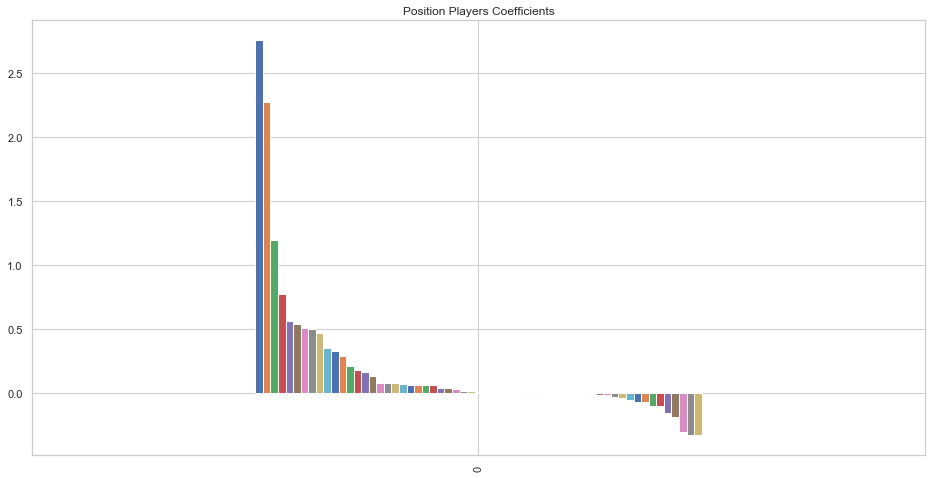

In [1679]:
no_goalies_lasso_coef01.plot(kind='bar', title='Position Players Coefficients', legend=False, figsize=(16,8))

# Goalies

In [1680]:
goalies = data

In [1681]:
goalies = goalies.drop(data[data['Position'] != 'GK' ].index)

In [1682]:
goalies.shape

(2025, 104)

In [1683]:
goalies_features = goalies.drop(['ID','Name','Photo','Nationality','Flag','Club','Club Logo','Value', 'Preferred Foot','Real Face','Position','Jersey Number','Joined','Loaned From','Contract Valid Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Body Type'],axis =1)
goalies_features.dropna(inplace = True)
target3 = goalies_features['Overall']
goalies_features = goalies_features.drop(['Overall'],axis = 1)

In [1684]:
goalies_features

,Age,Potential,Wage,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
3,27,93,260.0,1471,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,25,93,94.0,1331,13.0,11.0,15.0,29.0,13.0,12.0,13.0,14.0,26.0,16.0,43.0,60.0,67.0,86.0,49.0,22.0,76.0,41.0,78.0,12.0,34.0,19.0,11.0,70.0,11.0,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144.5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18,26,92,240.0,1328,15.0,14.0,11.0,36.0,14.0,17.0,18.0,12.0,42.0,18.0,38.0,50.0,37.0,85.0,43.0,22.0,79.0,35.0,79.0,10.0,43.0,22.0,11.0,69.0,25.0,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123.3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
19,26,90,240.0,1311,14.0,14.0,13.0,33.0,12.0,13.0,19.0,20.0,35.0,23.0,46.0,52.0,61.0,84.0,45.0,36.0,68.0,38.0,70.0,17.0,23.0,15.0,13.0,44.0,27.0,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113.7,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
22,32,89,130.0,1473,15.0,13.0,25.0,55.0,11.0,30.0,14.0,11.0,59.0,48.0,54.0,60.0,51.0,84.0,35.0,25.0,77.0,43.0,80.0,16.0,29.0,30.0,12.0,70.0,47.0,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,62.7,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18172,18,65,1.0,778,13.0,9.0,10.0,24.0,6.0,14.0,13.0,11.0,15.0,16.0,22.0,31.0,25.0,35.0,38.0,20.0,47.0,22.0,41.0,5.0,18.0,6.0,5.0,30.0,15.0,37.0,16.0,10.0,12.0,53.0,45.0,56.0,49.0,46.0,119.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18178,18,65,1.0,738,10.0,7.0,11.0,22.0,6.0,8.0,10.0,8.0,20.0,12.0,24.0,28.0,33.0,40.0,29.0,15.0,48.0,20.0,38.0,6.0,20.0,10.0,7.0,18.0,12.0,28.0,16.0,11.0,10.0,47.0,46.0,50.0,45.0,51.0,94.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18180,22,58,1.0,987,19.0,15.0,15.0,26.0,14.0,13.0,12.0,19.0,19.0,25.0,40.0,42.0,45.0,47.0,52.0,25.0,55.0,33.0,58.0,20.0,20.0,29.0,13.0,20.0,29.0,28.0,12.0,15.0,16.0,45.0,49.0,50.0,50.0,45.0,78.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
18194,18,65,1.0,731,10.0,6.0,10.0,25.0,6.0,12.0,13.0,10.0,20.0,17.0,20.0,14.0,39.0,37.0,22.0,22.0,33.0,15.0,59.0,5.0,17.0,5.0,3.0,28.0,16.0,23.0,6.0,10.0,11.0,52.0,52.0,52.0,40.0,44.0,109.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1685]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(goalies_features, target3, random_state=25)

In [1686]:
scaler3 = StandardScaler()
scaler3.fit(X_train3)
X_train3 =pd.DataFrame(data=scaler3.transform(X_train3), columns= goalies_features.columns)
X_test3 =pd.DataFrame(data=scaler3.transform(X_test3), columns = goalies_features.columns)

In [1687]:
goalies_model = LinearRegression()
goalies_model = goalies_model.fit(X_train3, y_train3)
y_train_pred5 = goalies_model.predict(X_train3)
train_rmse5 = np.sqrt(metrics.mean_squared_error(y_train3, y_train_pred5))
print('Training Root Mean Squared Error:' , train_rmse5)

Training Root Mean Squared Error: 0.3031984291281934


In [1688]:
y_test_pred5 = goalies_model.predict(X_test3)
test_rmse5 = np.sqrt(metrics.mean_squared_error(y_test3, y_test_pred5))


print('Testing Root Mean Squared Error:' , test_rmse5)

Testing Root Mean Squared Error: 0.30326583491351927


In [1689]:
goalies_coef01 = pd.DataFrame(data=goalies_model.coef_).T
goalies_coef01.columns = X_train3.columns
goalies_coef01 = goalies_coef01.T.sort_values(by=0, ascending = False).T
goalies_coef01.T.head()

,0
Special,6.920129
GKPositioning,1.357822
GKReflexes,1.293503
GKDiving,1.235626
GKHandling,1.202870


In [1690]:
from sklearn.linear_model import Lasso

goalies_lasso = Lasso(alpha=0.01, normalize=False)

goalies_lasso.fit(X_train3,y_train3)

y_train_pred_6 = goalies_lasso.predict(X_train3)
y_pred6 = goalies_lasso.predict(X_test3)

train_rmse6 = metrics.mean_absolute_error(y_train3, y_train_pred_6)
test_rmse6 = np.sqrt(metrics.mean_squared_error(y_test3, y_pred6))
print('Training Error: '+ str(train_rmse6) )
print('Testing Error: '+ str(test_rmse6) )

Training Error: 0.2655842103288984
Testing Error: 0.3028610380997805


In [1767]:
goalies_lasso_coef = pd.DataFrame(data=goalies_lasso.coef_).T
goalies_lasso_coef.columns = X_train3.columns
goalies_lasso_coef = goalies_lasso_coef.T.sort_values(by=0,  ascending= False).T
goalies_lasso_coef.T.head(10)

,0
GKPositioning,1.818058
GKReflexes,1.721787
GKDiving,1.648956
GKHandling,1.603250
Reactions,1.152008
GKKicking,0.367596
Wage,0.056419
International Reputation_4.0,0.040713
Potential,0.038407
International Reputation_3.0,0.026985


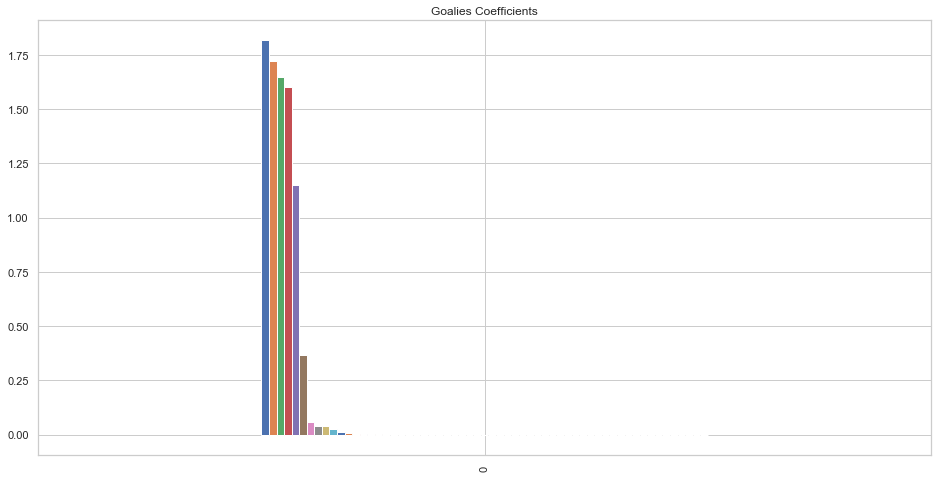

In [1692]:
goalies_lasso_coef.plot(kind='bar', title='Goalies Coefficients', legend=False, figsize=(16,8))

# Offense

In [1693]:
offense = data

In [1694]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [1695]:
offense = offense.drop(data[data['Position'] == 'CDM'].index)

In [1696]:
offense.shape

(17259, 104)

In [1697]:
offense.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM', 'RW',
       'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [1698]:
offense_features = offense.drop(['ID','Name','Photo','Nationality','Flag','Club','Club Logo','Value', 'Preferred Foot','Real Face','Position','Jersey Number','Joined','Loaned From','Contract Valid Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Body Type'],axis =1)
offense_features.dropna(inplace = True)
target4 = offense_features['Overall']
offense_features = offense_features.drop(['Overall'],axis = 1)

In [1699]:
offense_features

,Age,Potential,Wage,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,31,94,565.0,2202,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,33,94,405.0,2228,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,26,93,290.0,2143,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
3,27,93,260.0,1471,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,27,92,355.0,2281,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,65,1.0,1307,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18203,19,63,1.0,1098,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18204,16,67,1.0,1189,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18205,17,66,1.0,1228,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [1700]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(offense_features, target4, random_state=25)

In [1701]:
scaler4 = StandardScaler()
scaler4.fit(X_train4)
X_train4 =pd.DataFrame(data=scaler4.transform(X_train4), columns= offense_features.columns)
X_test4 =pd.DataFrame(data=scaler4.transform(X_test4), columns = offense_features.columns)

In [1702]:
offense_model = LinearRegression()
offense_model = offense_model.fit(X_train4, y_train4)
y_train_pred6 = offense_model.predict(X_train4)
train_rmse6 = np.sqrt(metrics.mean_squared_error(y_train4, y_train_pred6))
print('Training Root Mean Squared Error:' , train_rmse6)

Training Root Mean Squared Error: 1.809264166576871


In [1703]:
y_test_pred7 = offense_model.predict(X_test4)
test_rmse7 = np.sqrt(metrics.mean_squared_error(y_test4, y_test_pred7))


print('Testing Root Mean Squared Error:' , test_rmse7)

Testing Root Mean Squared Error: 1.8030164212782274


In [1704]:
offense_coef01 = pd.DataFrame(data=offense_model.coef_).T
offense_coef01.columns = X_train4.columns
offense_coef01 = offense_coef01.T.sort_values(by=0, ascending = False).T
offense_coef01.T.head(10)

,0
Special,20.507085
Potential,2.895875
Age,2.283930
Skill Moves_3.0,1.237181
Skill Moves_2.0,0.900111
Skill Moves_4.0,0.751329
Reactions,0.641683
Wage,0.539401
Composure,0.442785
Skill Moves_5.0,0.204509


In [1705]:
from sklearn.linear_model import Lasso

offense_lasso = Lasso(alpha=0.01, normalize=False)

offense_lasso.fit(X_train4,y_train4)

y_train_pred_8 = offense_lasso.predict(X_train4)
y_pred8 = offense_lasso.predict(X_test4)

train_rmse8 = metrics.mean_absolute_error(y_train4, y_train_pred_8)
test_rmse8 = np.sqrt(metrics.mean_squared_error(y_test4, y_pred8))
print('Training Error: '+ str(train_rmse8) )
print('Testing Error: '+ str(test_rmse8) )

Training Error: 1.4295534226608857
Testing Error: 1.8118495790338816


In [1706]:
offense_lasso_coef = pd.DataFrame(data=offense_lasso.coef_).T
offense_lasso_coef.columns = X_train4.columns
offense_lasso_coef = offense_lasso_coef.T.sort_values(by=0,  ascending= False).T
offense_lasso_coef.T.head(10)

,0
Potential,2.953359
Age,2.315493
Reactions,1.332859
BallControl,1.122909
GKReflexes,0.970050
HeadingAccuracy,0.789915
GKDiving,0.627558
ShortPassing,0.586510
GKHandling,0.507598
Stamina,0.502937


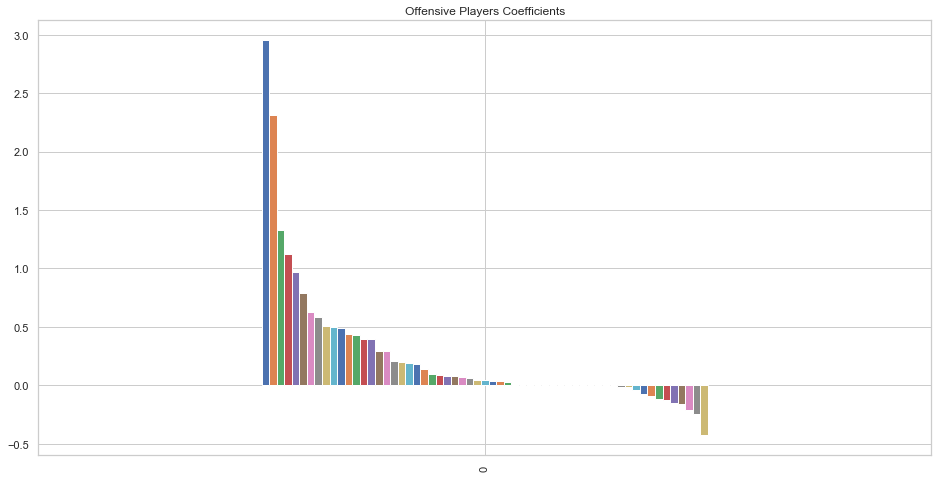

In [1707]:
offense_lasso_coef.plot(kind='bar', title='Offensive Players Coefficients', legend=False, figsize=(16,8))

# Midfield

In [1708]:
midfield = data

In [1709]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [1710]:
midfield = midfield.drop(data[data['Position'] == 'LWB'].index)

In [1711]:
midfield.shape

(18129, 104)

In [1712]:
midfield.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', nan], dtype=object)

In [1713]:
midfield_features = midfield.drop(['ID','Name','Photo','Nationality','Flag','Club','Club Logo','Value', 'Preferred Foot','Real Face','Position','Jersey Number','Joined','Loaned From','Contract Valid Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Body Type'],axis =1)
midfield_features.dropna(inplace = True)
target5 = midfield_features['Overall']
midfield_features = midfield_features.drop(['Overall'],axis = 1)

In [1714]:
midfield_features

,Age,Potential,Wage,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,31,94,565.0,2202,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,33,94,405.0,2228,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,26,93,290.0,2143,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
3,27,93,260.0,1471,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,27,92,355.0,2281,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,65,1.0,1307,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18203,19,63,1.0,1098,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18204,16,67,1.0,1189,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18205,17,66,1.0,1228,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [1715]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(midfield_features, target5, random_state=25)

In [1716]:
scaler5 = StandardScaler()
scaler5.fit(X_train5)
X_train5 =pd.DataFrame(data=scaler5.transform(X_train5), columns= midfield_features.columns)
X_test5 =pd.DataFrame(data=scaler5.transform(X_test5), columns = midfield_features.columns)

In [1717]:
midfield_model = LinearRegression()
midfield_model = midfield_model.fit(X_train5, y_train5)
y_train_pred9 = midfield_model.predict(X_train5)
train_rmse9 = np.sqrt(metrics.mean_squared_error(y_train5, y_train_pred9))
print('Training Root Mean Squared Error:' , train_rmse9)

Training Root Mean Squared Error: 1.8126435022613776


In [1718]:
y_test_pred10 = midfield_model.predict(X_test5)
test_rmse10 = np.sqrt(metrics.mean_squared_error(y_test5, y_test_pred10))


print('Testing Root Mean Squared Error:' , test_rmse10)

Testing Root Mean Squared Error: 1.8173638051545256


In [1719]:
midfield_coef01 = pd.DataFrame(data=midfield_model.coef_).T
midfield_coef01.columns = X_train5.columns
midfield_coef01 = midfield_coef01.T.sort_values(by=0, ascending = False).T
midfield_coef01.T.head(10)

,0
Special,15.395672
Potential,2.901171
Age,2.288996
Skill Moves_3.0,1.063427
Reactions,0.762826
Skill Moves_2.0,0.722699
Skill Moves_4.0,0.672932
Wage,0.552374
Composure,0.445453
BallControl,0.282397


In [1720]:
midfield_lasso = Lasso(alpha=0.01, normalize=False)

midfield_lasso.fit(X_train5,y_train5)

y_train_pred_11 = midfield_lasso.predict(X_train5)
y_pred11 = midfield_lasso.predict(X_test5)

train_rmse11 = metrics.mean_absolute_error(y_train5, y_train_pred_11)
test_rmse11 = np.sqrt(metrics.mean_squared_error(y_test5, y_pred11))
print('Training Error: '+ str(train_rmse11) )
print('Testing Error: '+ str(test_rmse11) )

Training Error: 1.4322535856284633
Testing Error: 1.8257423917995208


In [1721]:
midfield_lasso_coef = pd.DataFrame(data=midfield_lasso.coef_).T
midfield_lasso_coef.columns = X_train5.columns
midfield_lasso_coef = midfield_lasso_coef.T.sort_values(by=0,  ascending= False).T
midfield_lasso_coef.T.head(10)

,0
Potential,2.955777
Age,2.318484
Reactions,1.295697
BallControl,1.170297
GKReflexes,0.925308
HeadingAccuracy,0.764104
GKDiving,0.684563
ShortPassing,0.557366
Wage,0.501142
Stamina,0.499303


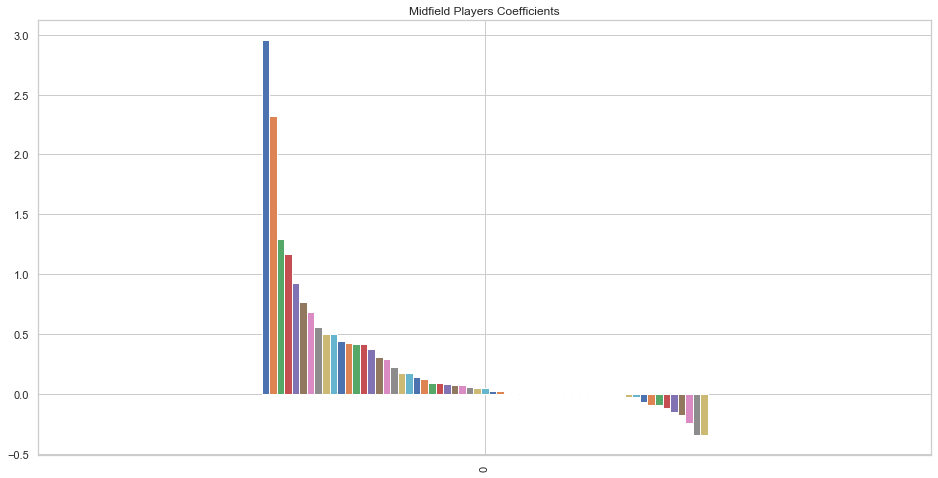

In [1722]:
midfield_lasso_coef.plot(kind='bar', title='Midfield Players Coefficients', legend=False, figsize=(16,8))

# Defense

In [1723]:
defense = data

In [1724]:
data.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [1725]:
defense = defense.drop(data[data['Position'] == 'CF'].index)

In [1726]:
defense.shape

(18133, 104)

In [1727]:
defense.Position.unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'RWB', 'LWB', nan], dtype=object)

In [1728]:
defense_features = defense.drop(['ID','Name','Photo','Nationality','Flag','Club','Club Logo','Value', 'Preferred Foot','Real Face','Position','Jersey Number','Joined','Loaned From','Contract Valid Until','Height','Weight','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Body Type'],axis =1)
defense_features.dropna(inplace = True)
target6 = defense_features['Overall']
defense_features = defense_features.drop(['Overall'],axis = 1)

In [1729]:
defense_features

,Age,Potential,Wage,Special,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,International Reputation_2.0,International Reputation_3.0,International Reputation_4.0,International Reputation_5.0,Weak Foot_2.0,Weak Foot_3.0,Weak Foot_4.0,Weak Foot_5.0,Skill Moves_2.0,Skill Moves_3.0,Skill Moves_4.0,Skill Moves_5.0,Work Rate_High/ Low,Work Rate_High/ Medium,Work Rate_Low/ High,Work Rate_Low/ Low,Work Rate_Low/ Medium,Work Rate_Medium/ High,Work Rate_Medium/ Low,Work Rate_Medium/ Medium
0,31,94,565.0,2202,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
1,33,94,405.0,2228,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
2,26,93,290.0,2143,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
3,27,93,260.0,1471,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,27,92,355.0,2281,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,65,1.0,1307,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,57.0,60.0,49.0,76.0,43.0,55.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18203,19,63,1.0,1098,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,39.0,38.0,40.0,52.0,41.0,47.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18204,16,67,1.0,1189,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,69.0,50.0,47.0,58.0,45.0,60.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
18205,17,66,1.0,1228,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,60.0,52.0,21.0,71.0,64.0,42.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143.0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [1730]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(defense_features, target6, random_state=20)

In [1731]:
scaler6 = StandardScaler()
scaler6.fit(X_train6)
X_train6 =pd.DataFrame(data=scaler6.transform(X_train6), columns= defense_features.columns)
X_test6 =pd.DataFrame(data=scaler6.transform(X_test6), columns = defense_features.columns)

In [1732]:
defense_model = LinearRegression()
defense_model = defense_model.fit(X_train6, y_train6)
y_train_pred12 = defense_model.predict(X_train6)
train_rmse12 = np.sqrt(metrics.mean_squared_error(y_train6, y_train_pred12))
print('Training Root Mean Squared Error:' , train_rmse12)

Training Root Mean Squared Error: 1.8127966040339836


In [1733]:
y_test_pred12 = defense_model.predict(X_test6)
test_rmse12 = np.sqrt(metrics.mean_squared_error(y_test6, y_test_pred12))


print('Testing Root Mean Squared Error:' , test_rmse12)

Testing Root Mean Squared Error: 1.8151130566472529


In [1734]:
defense_coef01 = pd.DataFrame(data=defense_model.coef_).T
defense_coef01.columns = X_train6.columns
defense_coef01 = defense_coef01.T.sort_values(by=0, ascending = False).T
defense_coef01.T.head(10)

,0
Special,21.056577
Potential,2.922315
Age,2.286855
Skill Moves_3.0,1.039561
Skill Moves_2.0,0.731088
Skill Moves_4.0,0.668427
Reactions,0.602063
Wage,0.542765
Composure,0.475616
Skill Moves_5.0,0.203288


In [1735]:
defense_lasso = Lasso(alpha=0.01, normalize=False)

defense_lasso.fit(X_train6,y_train6)

y_train_pred_13 = defense_lasso.predict(X_train6)
y_pred13 = defense_lasso.predict(X_test6)

train_rmse13 = metrics.mean_absolute_error(y_train6, y_train_pred_13)
test_rmse13 = np.sqrt(metrics.mean_squared_error(y_test6, y_pred13))
print('Training Error: '+ str(train_rmse13) )
print('Testing Error: '+ str(test_rmse13) )

Training Error: 1.4341695943898871
Testing Error: 1.8250627779636028


In [1736]:
defense_lasso_coef = pd.DataFrame(data=defense_lasso.coef_).T
defense_lasso_coef.columns = X_train6.columns
defense_lasso_coef = defense_lasso_coef.T.sort_values(by=0,  ascending= False).T
defense_lasso_coef.T.head(10)

,0
Potential,2.975630
Age,2.317409
Reactions,1.324236
BallControl,1.204653
GKReflexes,0.904289
HeadingAccuracy,0.807605
GKDiving,0.690167
Stamina,0.535875
Wage,0.488368
ShortPassing,0.481048


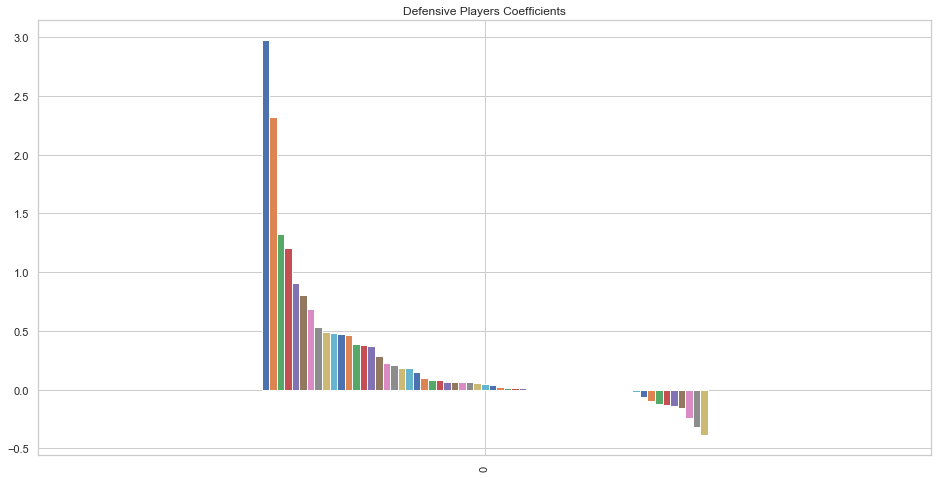

In [1737]:
defense_lasso_coef.plot(kind='bar', title='Defensive Players Coefficients', legend=False, figsize=(16,8))

# Data Visulization

Text(0.5, 1.0, 'Predictions VS Actual')

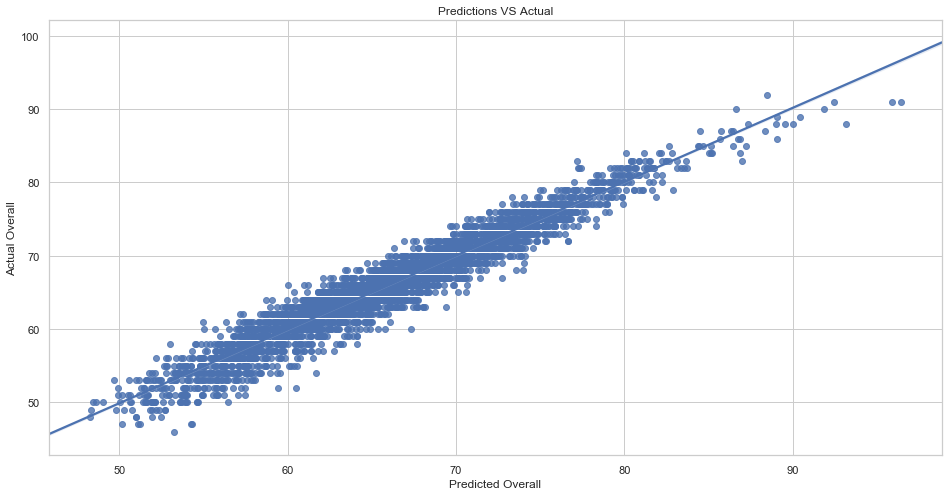

In [1738]:
plt.figure(figsize=(16,8))
sns.regplot(y_pred3,y_test)
plt.xlabel('Predicted Overall')
plt.ylabel('Actual Overall')
plt.title('Predictions VS Actual')

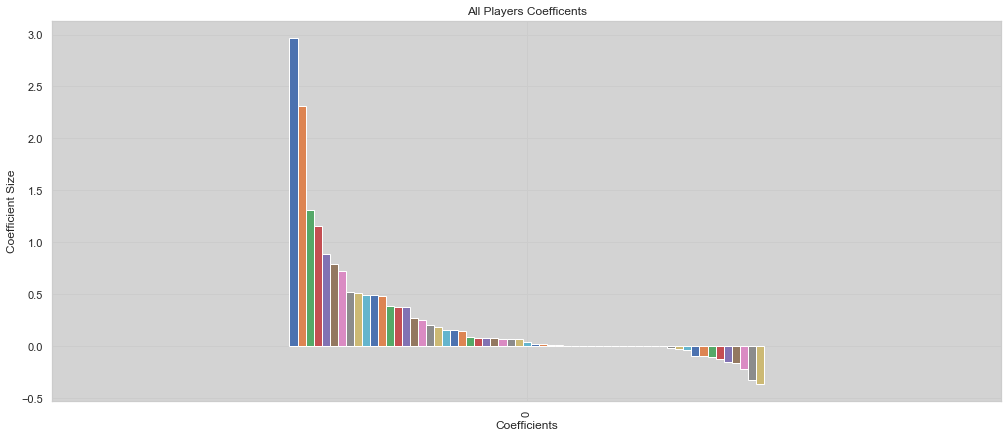

In [1739]:
ax = lasso_coef01.plot(kind = 'bar', figsize = (17,7), legend = False)
plt.xlabel('Coefficients')
plt.ylabel('Coefficient Size')
plt.title('All Players Coefficents')
ax.set_facecolor("lightgrey")

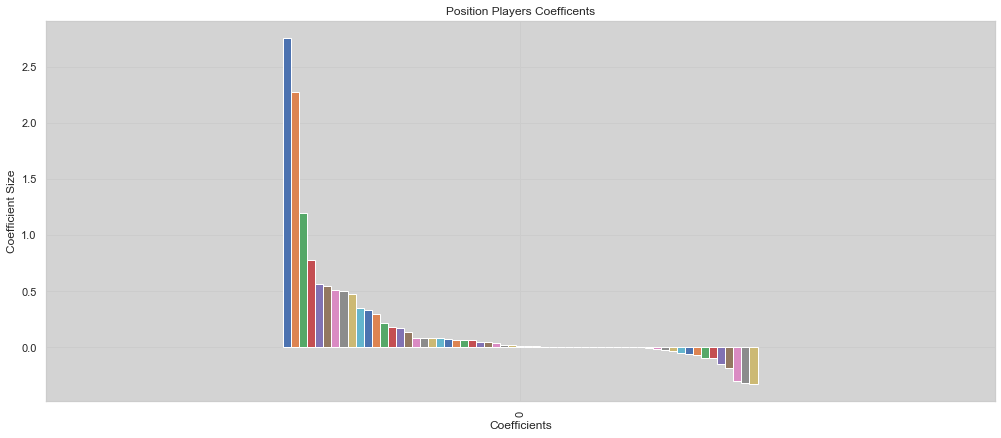

In [1740]:
ax = no_goalies_lasso_coef01.plot(kind = 'bar', figsize = (17,7), legend = False)
plt.xlabel('Coefficients')
plt.ylabel('Coefficient Size')
plt.title('Position Players Coefficents')
ax.set_facecolor("lightgrey")

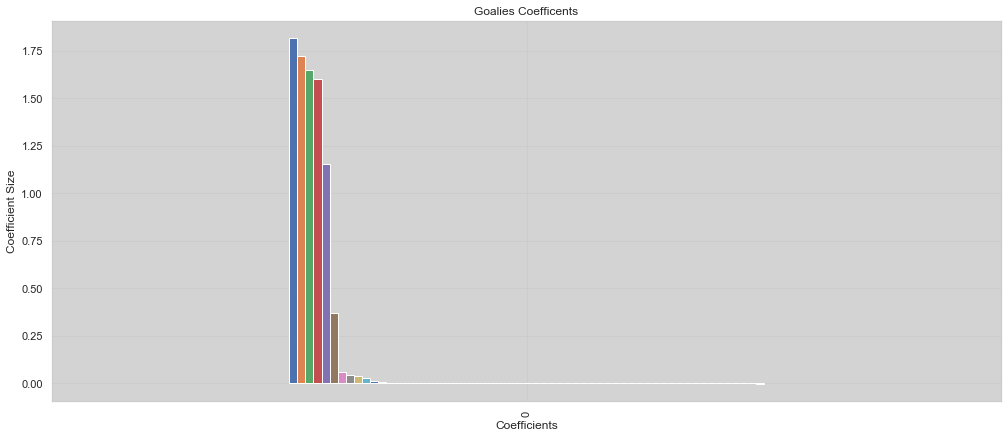

In [1741]:
ax = goalies_lasso_coef.plot(kind = 'bar', figsize = (17,7), legend = False)
plt.xlabel('Coefficients')
plt.ylabel('Coefficient Size')
plt.title('Goalies Coefficents')
ax.set_facecolor("lightgrey")

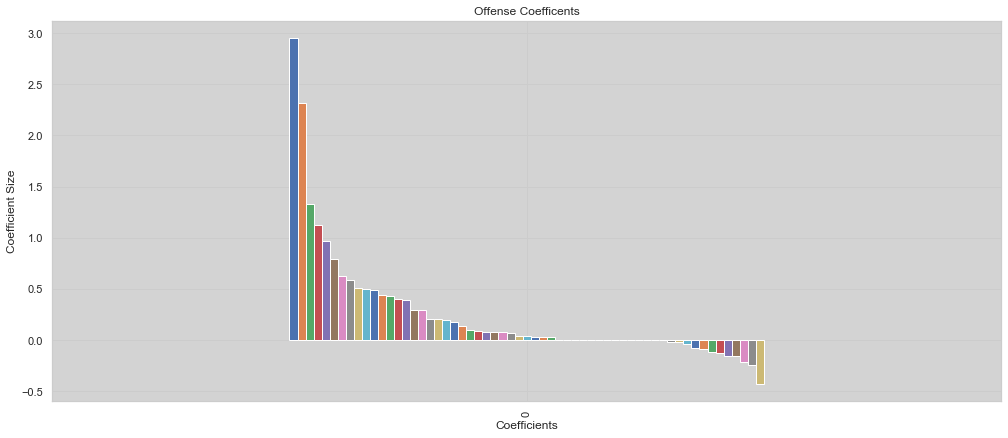

In [1742]:
ax = offense_lasso_coef.plot(kind = 'bar', figsize = (17,7), legend = False)
plt.xlabel('Coefficients')
plt.ylabel('Coefficient Size')
plt.title('Offense Coefficents')
ax.set_facecolor("lightgrey")

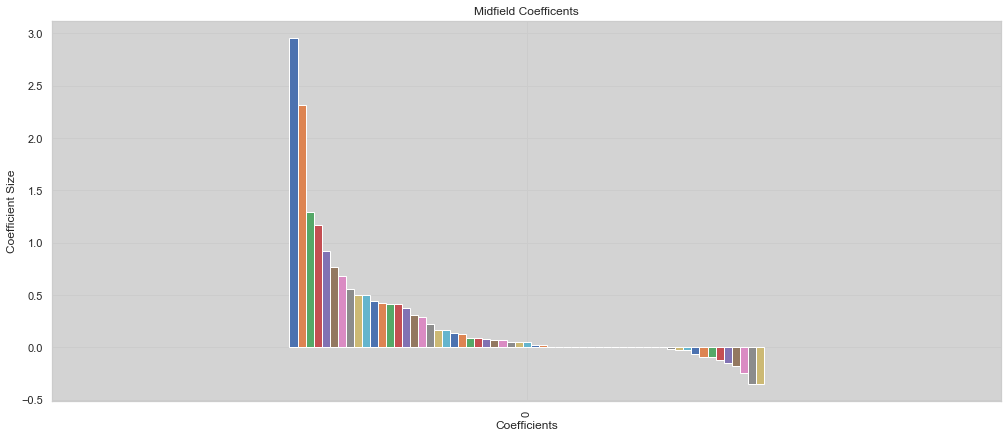

In [1743]:
ax = midfield_lasso_coef.plot(kind = 'bar', figsize = (17,7), legend = False)
plt.xlabel('Coefficients')
plt.ylabel('Coefficient Size')
plt.title('Midfield Coefficents')
ax.set_facecolor("lightgrey")

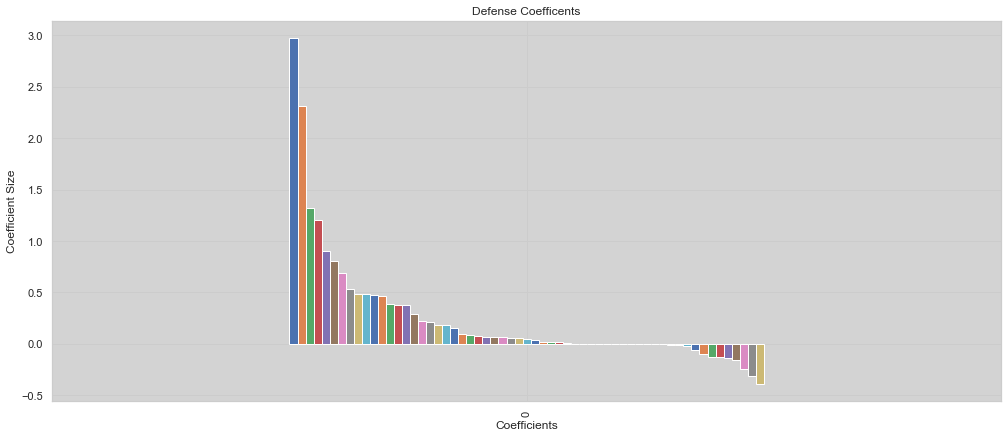

In [1744]:
ax = defense_lasso_coef.plot(kind = 'bar', figsize = (17,7), legend = False)
plt.xlabel('Coefficients')
plt.ylabel('Coefficient Size')
plt.title('Defense Coefficents')
ax.set_facecolor("lightgrey")

In [1745]:
y_test = pd.DataFrame(y_test)
y_test=y_test.reset_index()

In [1750]:
y_test = y_test.reset_index()

In [1751]:
y_pred_3 = pd.DataFrame(y_pred3)
y_pred_3

,0
0,79.058116
1,63.506196
2,63.331230
3,57.662946
4,56.096764
...,...
4156,66.409815
4157,55.679425
4158,70.177911
4159,70.663346


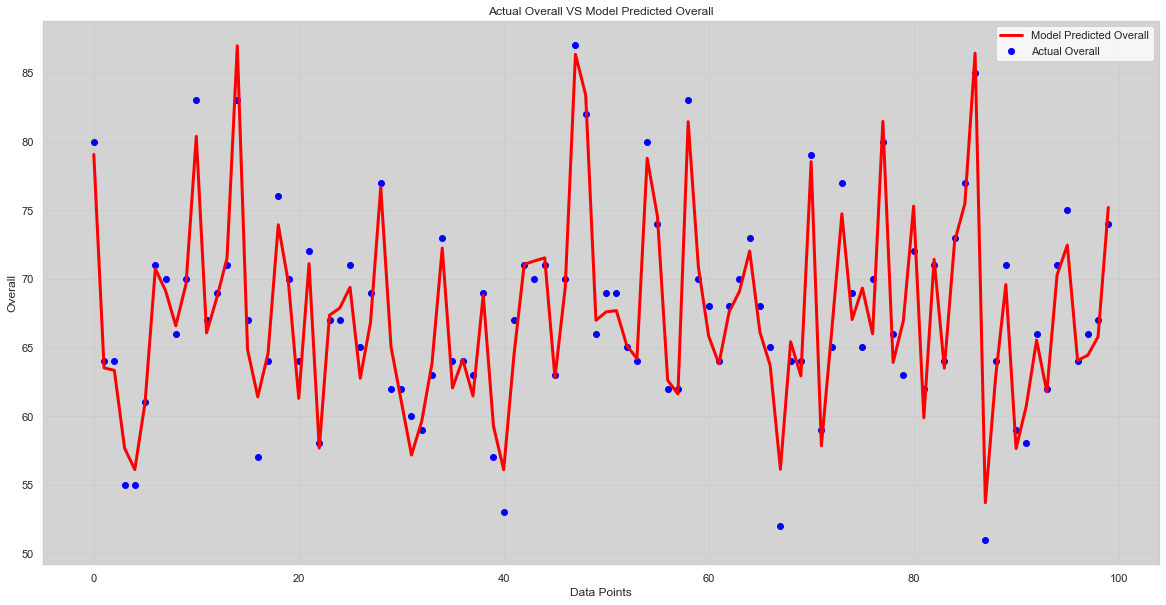

In [1752]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(y_test['level_0'].head(100),y_test['Overall'].head(100), label = 'Actual Overall', color = 'blue')
plt.plot(y_pred_3.head(100), color = 'red', linewidth = 3, label = 'Model Predicted Overall')
ax.set_facecolor("lightgrey")
plt.xlabel('Data Points')
plt.ylabel('Overall')
plt.title('Actual Overall VS Model Predicted Overall')
plt.legend()

# Conclusion

The model predicted very well to an Overall Rating. However it varied for each position. 
All players should focus on Potential, and Ball Control
Offensive Players should focus on Skill moves and their Special rating.
Defensive players should focus on Short passing and Stamina.
Midfielders should focus on Short passing and Stamina, as well as their skill moves. 
Goalies should focus on their goalkeeping skills only, but specifically, they should focus on their positioning and reflexes.